# Modelo 3 Random Forest con variables con importancia mayor a 0.05 y los hiperparámetros aplicados directamente al modelo

### Carga y división de datos

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Carga de los datos
df_ingresos_m2 = pd.read_csv('../Datos/Procesados/income.csv')
df_ingresos_m2.drop(columns=['fnlwgt', 'education', 'sex', 'capital-loss', 'workclass', 'race', 'native-country'], inplace=True)
df_ingresos_m2.head()

,age,education-num,marital-status,occupation,relationship,capital-gain,hours-per-week,income
0,39,13,Never-married,Adm-clerical,Not-in-family,2174,40,<=50K
1,50,13,Married-civ-spouse,Exec-managerial,Husband,0,13,<=50K
2,38,9,Divorced,Handlers-cleaners,Not-in-family,0,40,<=50K
3,53,7,Married-civ-spouse,Handlers-cleaners,Husband,0,40,<=50K
4,28,13,Married-civ-spouse,Prof-specialty,Wife,0,40,<=50K


In [4]:
# División de datos
X = df_ingresos_m2.drop(columns=['income'])
y = df_ingresos_m2.income

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creación del pipeline

In [5]:
# Dividir columnas
columnas_categoricas = X.select_dtypes(include='object').columns.tolist()

# Preprocesador con OneHotEncoder
preprocesador = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), columnas_categoricas)
    ], remainder='passthrough'
)

In [6]:
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocesamiento', preprocesador),
    ('modelo', RandomForestClassifier(class_weight='balanced', random_state=42, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100))
])

In [7]:
# Entrenamiento
pipeline.fit(X_train, y_train)

c:\Users\Alex\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['marital-status',
                                                   'occupation',
                                                   'relationship'])])),
                ('modelo',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=2, random_state=42))])

In [8]:
# Predicciones
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

### Evaluación del modelo

In [9]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Accuracy train:', train_accuracy)
print('Accuracy test:', test_accuracy)

Accuracy train: 0.8876798876798877
Accuracy test: 0.8329409356126523


In [10]:
# Clasification report
reporte = classification_report(y_test, y_test_pred)
print(reporte)

              precision    recall  f1-score   support

       <=50K       0.93      0.84      0.89      7455
        >50K       0.61      0.80      0.69      2314

    accuracy                           0.83      9769
   macro avg       0.77      0.82      0.79      9769
weighted avg       0.86      0.83      0.84      9769



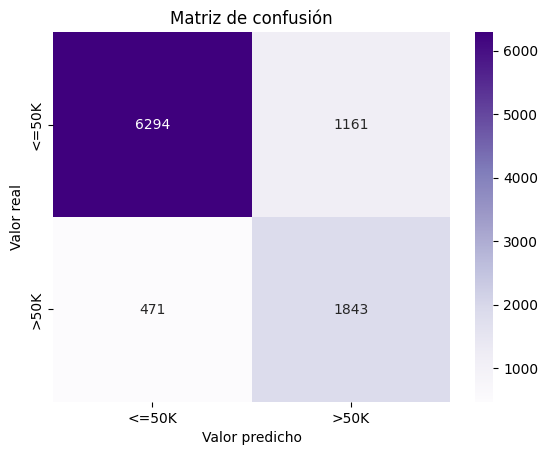

In [14]:
# Matríz de confusión
matriz_confusion = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matriz_confusion, annot=True, fmt='d', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'], cmap='Purples')
plt.xlabel("Valor predicho")
plt.ylabel("Valor real")
plt.title("Matriz de confusión")
plt.show();